In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn


First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Summary statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.0

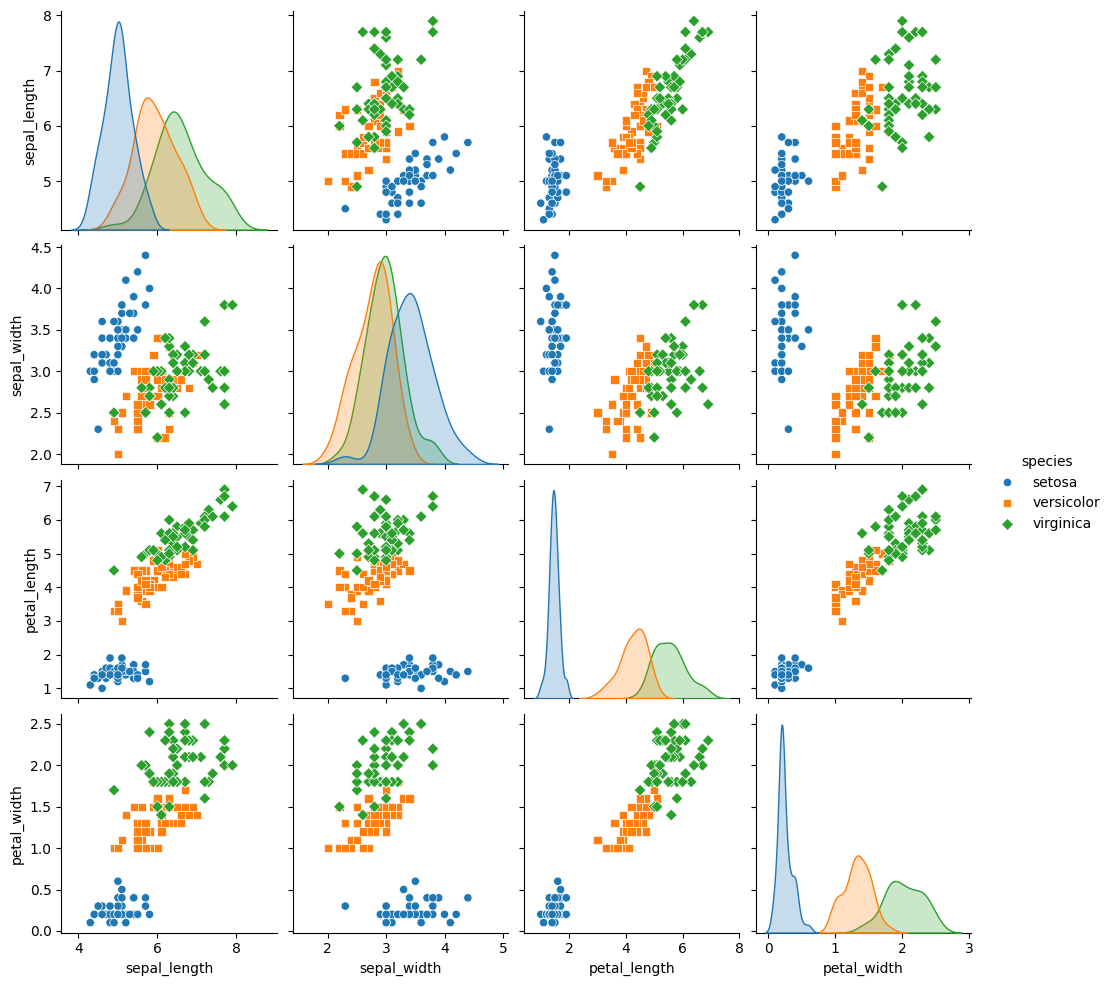

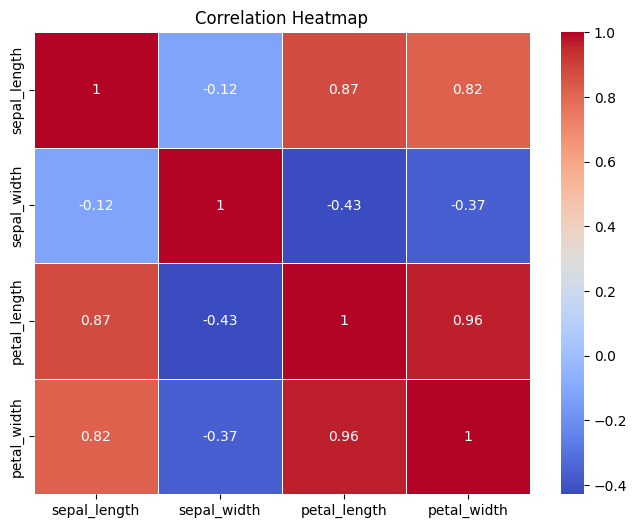


Model Evaluation:
[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

Accuracy: 0.8888888888888888


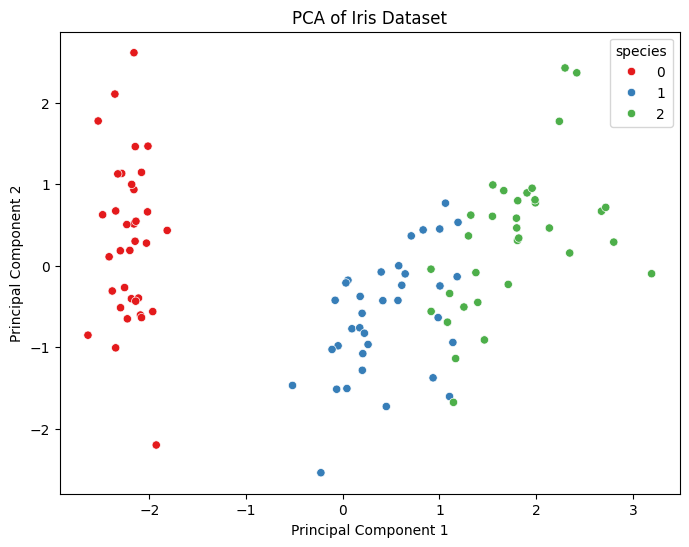

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# Step 1: Load the Dataset

def load_dataset():
    # Loading the Iris dataset from seaborn's built-in datasets
    iris = sns.load_dataset('iris')
    return iris

# Step 2: Exploratory Data Analysis (EDA)

def perform_eda(df):
    print("First 5 rows of the dataset:")
    print(df.head())

    print("\nDataset Information:")
    df.info()

    print("\nSummary statistics:")
    print(df.describe())

    print("\nChecking for missing values:")
    print(df.isnull().sum())

    # Visualizing the distribution of each feature
    sns.pairplot(df, hue='species', markers=["o", "s", "D"])
    plt.show()

    #Select only numerical columns for correlation calculation
    numerical_df = df.select_dtypes(include=['float', 'int'])

    # Correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Step 3: Data Preprocessing

def preprocess_data(df):
    # Encoding the categorical variable 'species'
    df['species'] = df['species'].astype('category').cat.codes

    # Separating features and target variable
    X = df.drop('species', axis=1)
    y = df['species']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Standardizing the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Step 4: Build and Evaluate a Machine Learning Model

def build_and_evaluate_model(X_train, X_test, y_train, y_test):
    # Using Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Making predictions
    y_pred = rf_model.predict(X_test)

    # Evaluating the model
    print("\nModel Evaluation:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 5: Dimensionality Reduction with PCA

def apply_pca(X_train, X_test):
    pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    return X_train_pca, X_test_pca

# Step 6: Visualization of PCA results

def visualize_pca(X_train_pca, y_train):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='Set1')
    plt.title('PCA of Iris Dataset')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Main function to orchestrate the entire process

def main():
    # Load the dataset
    iris_df = load_dataset()

    # Perform EDA
    perform_eda(iris_df)

    # Preprocess the data
    X_train, X_test, y_train, y_test = preprocess_data(iris_df)

    # Build and evaluate the model
    build_and_evaluate_model(X_train, X_test, y_train, y_test)

    # Apply PCA
    X_train_pca, X_test_pca = apply_pca(X_train, X_test)

    # Visualize the PCA results
    visualize_pca(X_train_pca, y_train)

if __name__ == "__main__":
    main()
